/tmp/ipython-input-2497119759.py:25: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 122k/122k [00:00<00:00, 258kB/s]


Dataset Shape: (569, 33)

=== Decision Tree Performance ===
Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


=== Random Forest Performance ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



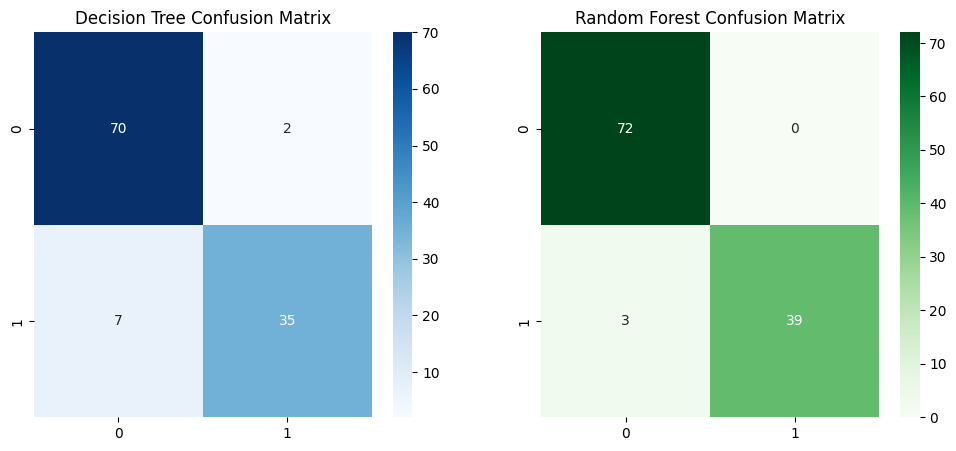

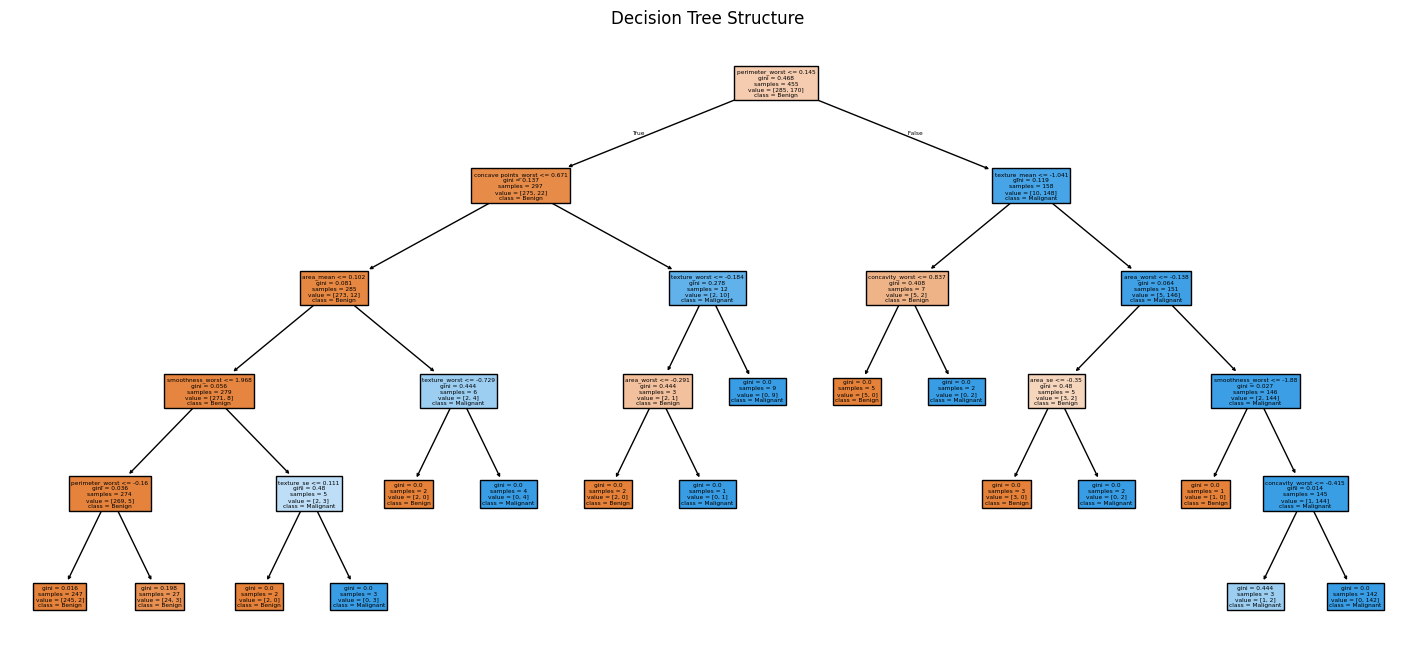

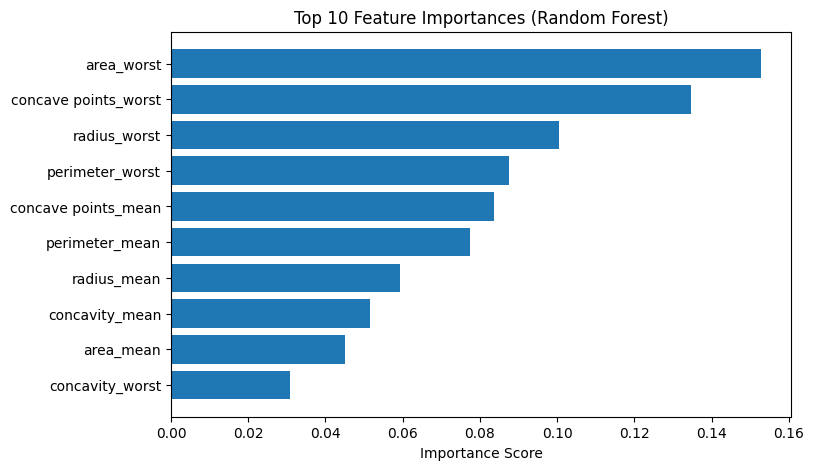

In [4]:
# =========================
# Decision Tree & Random Forest Classification
# KaggleHub (FINAL FIXED VERSION)
# =========================

!pip install kagglehub -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# Load Dataset (CORRECT & STABLE)
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv"
)

print("Dataset Shape:", df.shape)
df.head()

# -------------------------
# Data Preprocessing
# -------------------------
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Decision Tree
# -------------------------
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_test_scaled)

# -------------------------
# Random Forest
# -------------------------
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# -------------------------
# Evaluation
# -------------------------
print("\n=== Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# -------------------------
# Confusion Matrices
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, dt_preds),
            annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, rf_preds),
            annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()

# -------------------------
# Decision Tree Visualization
# -------------------------
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"],
    filled=True
)
plt.title("Decision Tree Structure")
plt.show()

# -------------------------
# Feature Importance (Random Forest)
# -------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(X.columns[indices], importances[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()
